# <div dir=rtl> תרגול שתים עשרה - CNNs and advanced layering </div>
<div dir=rtl>
     בתרגול זה נכיר מודל נוסף - שכבות קונבולוציה. בנוסף, נכיר כלים מתמטיים וסטטיסטיים לשיפור הארכיטקטורה הכללית.
    <br />
    <br />
</div>

<div dir=rtl>
    רשתות קונבולוציה הן רשתות שמותאמות לדאטה רב מימדי ומורכב - לדוגמה תמונה בעלת פיקסלים. <br />
    הרשת מקבלת כאינפוט את הדאטה הגולמי ויודעת לזהות בו דפוסים ללא עיבוד מוקדם של המידע. <br /><br />
    בעצם תמונה היא אוסף של פיסקלים - למה לא לשטח אותה ולהשתמש ברשת נוירונים פשוטה כמו MLP?
</div>

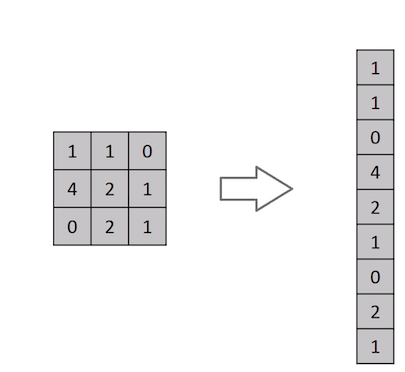

<div dir=rtl>
    זה לא יעבוד לתמונות מסובכות עם תלויות בין הפיקסלים... <br />
    נכיר כמה שכבות מיוחדות ברשתות שיפתרו לנו את הבעיה הזו:
</div>

## Convolution layer

<div dir=rtl>
    קונבולוציה  משמעותה - מכפלה של סיגנלים אחד בשני, סכימה שלהם והזזה ביחידה אחת של אחד מהם. 
</div>

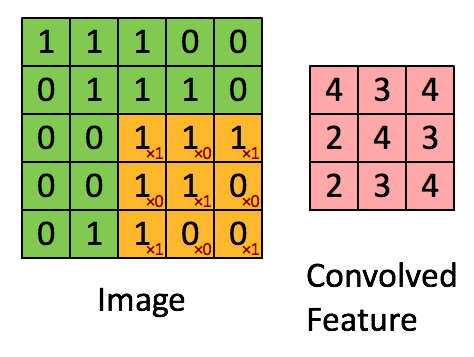

<div dir=rtl>
    הכפלנו את המטריצה במטריצה קטנה יותר, סכמנו את מה שהתקבל והורדנו את המימד של האינפוט. <br />
    פעולה זו מאפשרת לקבל את הפיצ׳רים המאוד כללים של האינפוט - עבור תמונות לדוגמה נוכל לקבל את קווי המתאר, הבדלי צבעים וככל שנבצע קונבולוציה עמוקה יותר נוכל להבין מורכבות גדולה יותר. <br />
    <br/ >
    לעיתים בשביל לשחק עם גדלי השכבות מוסיפים <code>padding</code> שורות של אפסים שתוחמות את האינפוט. הוספת שורות האפסים עוזרת לשלוט בגודל כל שכבה ולא בהכרח להקטין אותה לאחר ביצוע הקונבולוציה (אחרי הוספת שכבת האפסים המטריצה המתוארת  כאן תישאר בגודל הזהה לגודלה לאחר ההכפלה) 
<br />
    יתרון נוסף של שכבות קונבולוציה הוא מספר הפרמטרים הנלמדים - נסתכל על הדוגמה החד מימדית הבאה:
</div>

![](12_1d_conv.png)
<div dir=rtl>
    למעלה מוצג המקרה בו הקרנל (הסיגנל ה"שני" למעט הקלט לשכבה) הוא מגודל 3. כמה פרמטרים יש לשכבה? נספור - הקרנל עצמו מכיל שלושה פרמטרים ופרמטר נוסף שקיים ולא מוצג בתמונה הוא הביאס, לכן בשכבה הזו קיימים ארבעה פרמטרים נלמדים. נניח שהיינו רוצים לעבור משכבה בעלת 7 מספרים לשכבה בעלת 5 מספרים עם מודל MLP, כמה פרמטרים היינו צריכים? לפחות 35.
    <br />
</div>

## Pooling Layer

<div dir=rtl>
    שכבת פולינג מצמצמת את גודל הנתונים שאיתם אנחנו עובדים ומפחיתה בקצת את הסיבוכיות.  הרעיון- לזקק את המידע מהאינפוט (low-level information) לפיצ'רים המסוגלים לתפוס אינפורמציה מופשטת מחלק רחב של הדאטא (high-level information).
    <br />
    בשכבה מסוג זה ניקח מספר ערכים, נחשב בניהם ערך כלשהו (מקסימום, מינימום, ממוצע וכו) ונעביר הלאה רק את הערך הזה. </div>

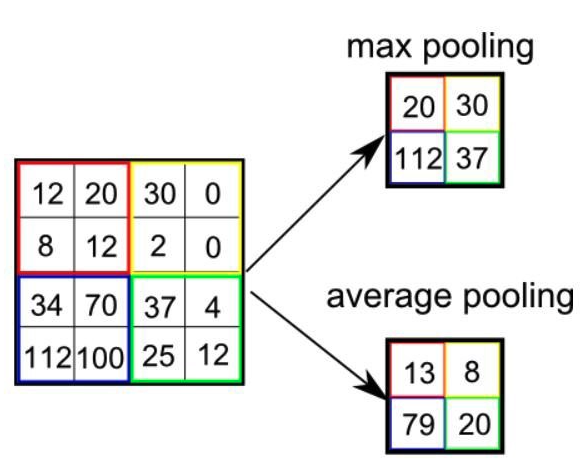

## Normalization Layer
<div dir=rtl>
    דיברנו בתרגול הקודם על פונקציות אקטיבציה וראינו שחלקן דורשות פילוג מסוים של הדאטא על מנת לעבוד. סיגמואיד למשל "יעיל" בתחום מסוים  מסביב לאפס והרחק ממנו כל הדאטא מועבר לאפס או לאחת. שכבות נרמול דואגות לפילוג נוח מסביב לאפס עם סטיית תקן קרובה לאחת. לאורך האימון השכבה לומדת מה הממוצע ומה סטיית התקן של המידע שעובר דרכן. בסוף האימון הנתונים האלה מתקבעים והיא ממפה את כל הדוגמאות לפי הממוצע הכולל וסטיית התקן הכוללת.
    <br />
    קיימות שיטות רבות לנרמול:
</div>

![](12_normalization.png)

<div dir=rtl>
    אנחנו נתמקד בנפוצה ביותר - נרמול לפי מקבץ. בשיטה הזו הממוצע וסטיית התקן של כל הדוגמאות הנכנסות מחושבים לכל ערוץ בנפרד של הדאטא (למשל לכל הערוץ הירוק בתמונות צבעוניות).
</div>


## Dropout Layer

<div dir=rtl>
    שכבת דרופאאוט מאפסת את המידע העובר דרכה באופן רנדומלי. הדבר שימושי כמעין רגולריזציה ועוזר להתמודד עם אוברפיט. הדרופאאוט מתבצע בעת האימון בלבד. בזמן המבחן אין דרופאאוט.</div>

![](12_dropout.png)
<br /><br />
<div dir=rtl>
    בשלב זה נציין שיש עוד עשרות ואולי מאות גישות שונות לרשתות נוירונים ולא ניתן לדון בכולן במסגרת הזו. עם הכלים שראינו בתרגול הזה והקודם לו ניתן לבנות גן חיות שלם של מודלים ללמידה עמוקה. נקודת אור גדולה בעולם הזה היא שלרוב כשמפרסמים מאמר אקדמי על רשת, דאטא מתאימה או שיטה ללמידה עמוקה מפרסמים גם את הקוד והוא זמין עבורכם לקריאה.
</div>

## <div dir=rtl> שאלה 1 </div>


<div dir=rtl>
    נתון דאטא סט עם 2400 תמונות מהעולם האמיתי של שלוש מחלקות - מטוס, ציפור ומכונית. כל תמונה בגודל 96*96 עם שלושה ערוצי צבע. 
    <br />
    מצא מודל אשר מסוגל לסווג את התמנות למחלקות שלהן.
</div>
<br /> 
<div dir=rtl>
    ראשית נטען את הדאטא ונבחן אותו:
</div>


In [5]:
def return_dataloaders(BS=4):
    transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor()
    ])
    
    dataset = torchvision.datasets.STL10('./', split='test', download=True, transform=transform)
    classes_to_take = np.array([0,1,2])
    
    indices = np.where(
        np.isin(
            dataset.labels,
            classes_to_take
        )
    )[0]

    
    from sklearn.model_selection import train_test_split
    np.random.seed(0)
    train_ind, val_ind = train_test_split(
        indices,
        stratify=dataset.labels[indices],
        train_size = 0.8
    )
    
    train_sampler = torch.utils.data.SubsetRandomSampler(train_ind)
    train_loader = torch.utils.data.DataLoader(dataset, sampler = train_sampler, batch_size=BS)
    
    val_sampler = torch.utils.data.SubsetRandomSampler(val_ind)
    val_loader = torch.utils.data.DataLoader(dataset, sampler = val_sampler, batch_size=BS)
    
    return train_loader, val_loader
    
import torch
import torch.nn as nn
import torchvision

import numpy as np

train_loader, val_loader = return_dataloaders()

0it [00:00, ?it/s]

Extracting /Users/daniellemiller/Downloads/stl10_binary.tar.gz to /Users/daniellemiller/Downloads


In [2]:
import pickle
import torch
import torch.nn as nn

import numpy as np


# with open('/Users/daniellemiller/Downloads/train_loader.pkl', 'wb') as o:
#     pickle.dump(o, train_loader)

# with open('/Users/daniellemiller/Downloads/val_loader.pkl', 'wb') as o:
#     pickle.dump(o, val_loader)

with open('/Users/daniellemiller/Downloads/train_loader.pkl', 'rb') as o:
    train_loader = pickle.load(o)
    
with open('/Users/daniellemiller/Downloads/val_loader.pkl', 'rb') as o:
    val_loader = pickle.load(o)

<div dir=rtl>
    מעל כתובה פונקציה הטוענת את הדאטא. משום שהיא מאוד ספציפית לעולם הפייטורצ' לא ניכנס אליה לפרטים. היא טוענת 2400 תמונות של שלוש המחלקות הראשונות בדאטא סט מאת סטנפורד בשם STL10.
    <br />
    כעת נצפה בתמונות. נגדיר אובייקט איטרטור ונשלוף ממנו מדגם:
</div>


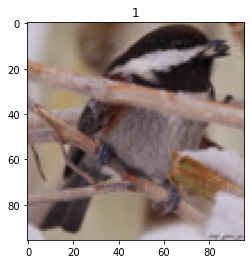

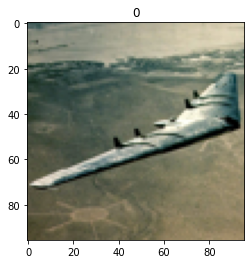

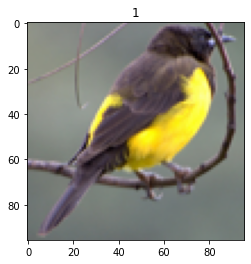

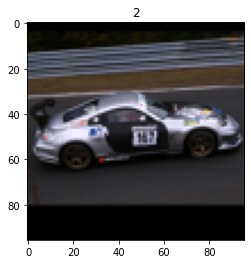

In [3]:
it = iter(val_loader)
b = next(it)

import matplotlib.pyplot as plt

for i in range(4):
    plt.figure()
    plt.imshow(b[0][i,...].permute(1,2,0))
    plt.title(b[1][i].item())

<div dir=rtl>
    אכן קיבלנו אוסף תמונות ולייבלים כמצופה. כעת נבחר מודל. נבחר באופן שרירותי (על סמך ידע קודם והיכרות עם מסווגים) מודל מסוג רשת קונבולוציה עם מסווג לינארי בקצה כמתואר באיור למטה. המודל מקבל תמונה, מחיל מספר פעמים קונבולוציה ולבסוף משטח את התוצאה לווקטור אחד ארוך ועושה עליו סיווג. בין הקונבולוציות ננרמל את הנתונים ובחלק של הסיווג נוסיף דרופאאוט.
    <br />
    שאלות להבנה: מה מייצגת כל תיבה באיור? תיבה שקופה\כחולה? מה מייצג כל חץ? איך הגענו מתיבה בעומק 3 לתיבה בעומק 4? באיור חסרים שני מספרים על שתי תיבות - מה הם המספרים?
</div>

![](12_conv_net.png)
<br /><br /><br /><br /><br /><br /><br />
<div dir=rtl>
    התיבות השקופות הן בעצם הדאטא שלנו בשלבים הראשונים של העיבוד (נשים לב כי בכניסה הוא במימדים של התמונה המקורית). כל תיבה כחולה מייצגת קרנל קונבולוציה אחד. עברנו משלושה ערוצים (עומק של שלוש) לארבעה ערוצים (עומק של ארבע) משום שהחלנו ארבעה קרנלים שונים על אותה שכבה. כל קרנל החזיר מפה בעומק אחת - ואת המפות האלה חיברנו לטנזור. באיור חסרים המימדים של הווקטורים בחלק של המסווג. הווקטור הראשון הוא השטחה של התיבה האחרונה - שרשור כל הערכים לווקטור אחד ארוך לכן הוא מכפלת כל המימדים של הטנזור האחרון. הווקטור במוצא של המודל הוא באורך מספר המחלקות שלנו - שלוש. כל חץ בחלק של המסווג מייצג כפל של מטריצה בווקטור והוספה של ביאס (גם ווקטור).
</div>


In [8]:
from torchsummary import summary

In [15]:
model = nn.Sequential(
    nn.Conv2d(3,4,3),
    nn.BatchNorm2d(4),
    nn.ReLU(),
    nn.MaxPool2d(2),
    
    nn.Conv2d(4,16,3),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.MaxPool2d(2),
    
    nn.Conv2d(16,16,3),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.MaxPool2d(2),
    
    nn.Flatten(),
    nn.Linear(16*10*10,100),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    
    nn.Linear(100,3),
)

summary(model, (3,96,96))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 94, 94]             112
       BatchNorm2d-2            [-1, 4, 94, 94]               8
              ReLU-3            [-1, 4, 94, 94]               0
         MaxPool2d-4            [-1, 4, 47, 47]               0
            Conv2d-5           [-1, 16, 45, 45]             592
       BatchNorm2d-6           [-1, 16, 45, 45]              32
              ReLU-7           [-1, 16, 45, 45]               0
         MaxPool2d-8           [-1, 16, 22, 22]               0
            Conv2d-9           [-1, 16, 20, 20]           2,320
      BatchNorm2d-10           [-1, 16, 20, 20]              32
             ReLU-11           [-1, 16, 20, 20]               0
        MaxPool2d-12           [-1, 16, 10, 10]               0
          Flatten-13                 [-1, 1600]               0
           Linear-14                  [

<div dir=rtl>
    כאן אנחנו עוסקים בבעיית סיווג - והלוס המתאים הוא cross entropy המייצג את האנטרופיה היחסית של שני ווקטורים. 
    <br />
    בדומה למה שראינו בתרגול הקודם נבחר לעשות אופטימיזציה לפי Stochastic Gradient Descent עם קצב למידה שנבחר אמפירית. בשלב זה נציין שקיימים אלגוריתמים מתוחכמים יותר לאופטימיזציה, אך לא נדון עליהם כעת.
</div>


In [16]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

n_epochs = 10

<div dir=rtl>
    כל שנותר הוא לאמן. בפייטורצ' עלינו להגדיר את לולאת האימון בעצמינו - דבר שמסבך את הקוד אבל נותן חופש למשתמש. נבחר לרוץ מספר פעמים על הדאטא (כל מעבר נקרא אפוק) ובכל מעבר על הדאטא נבחר מקבץ בן 4 תמונות ממנו, נפיק פרדיקציות מהמודל, נשווה ללייבלים ונחשב שגיאה, נחשב את הנגזרות של השגיאה כתלות בכל פרמטר במודל ונגיד לאלגוריתם אופטימיזציה ללכת בכיוון המנוגד לגרדיאנט.
    <br />
    בניגוד למה שראינו בתרגול קודם, כאן נרצה לעשות וולידציה כלשהי על הלמידה - לכן יש עוד לולאה זהה לחלוטין למעט העובדה שבה אנחנו לא צריכים לחשב גרדיאנט (לכן נורה על כך לפייטורצ'). נדאג גם להעביר את המודל למצב אבלואציה - דבר בעל חשיבות כשיש שכבות של נורמליזציה ודרופאאוט.
</div>


In [17]:
epoch_train_losses = list()
epoch_valid_losses = list()

for iteration in range(n_epochs):
    batch_losses = list()
    
    model.train()
    for images, labels in train_loader:
        output = model(images)


        loss = loss_func(output, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_losses.append(loss.item())
        
    model.eval()
    batch_val_losses = list()
    with torch.no_grad():
        for images, labels in val_loader:
            output = model(images)
            loss = loss_func(output, labels)
            batch_val_losses.append(loss.item())
            
    
    epoch_train_losses.append(np.mean(batch_losses))
    epoch_valid_losses.append(np.mean(batch_val_losses))
    print(f'Epoch {iteration}: Train loss {epoch_train_losses[-1]:0.4f}, Val loss {epoch_valid_losses[-1]:0.4f}')

Epoch 0: Train loss 0.8966, Val loss 0.6562
Epoch 1: Train loss 0.6582, Val loss 0.4943
Epoch 2: Train loss 0.5455, Val loss 0.5165
Epoch 3: Train loss 0.4899, Val loss 0.3800
Epoch 4: Train loss 0.4442, Val loss 0.3796
Epoch 5: Train loss 0.4143, Val loss 0.3625
Epoch 6: Train loss 0.3920, Val loss 0.3541
Epoch 7: Train loss 0.3819, Val loss 0.3104
Epoch 8: Train loss 0.3376, Val loss 0.3009
Epoch 9: Train loss 0.3316, Val loss 0.3643


Text(0, 0.5, 'Loss')

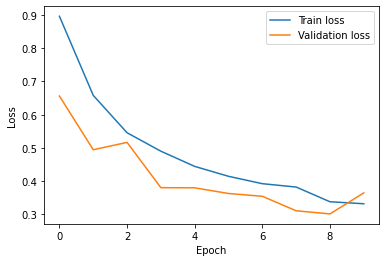

In [18]:
plt.plot(np.arange(len(epoch_train_losses)), epoch_train_losses)
plt.plot(np.arange(len(epoch_valid_losses)), epoch_valid_losses)
plt.legend(['Train loss', 'Validation loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

<div dir=rtl>
    ניזכר שהמספר עצמו של הלוס פחות מעניין. עקומת הלמידה יותר מעניינת ואכן נראה שהלמידה הגיע להתייצבות. אולי ניתן להשתפר, אבל מפאת זמן אימון לא נעשה זאת כרגע.
    <br />
    נפיק פרדיקציות ונחשב confusion matrix:
</div>

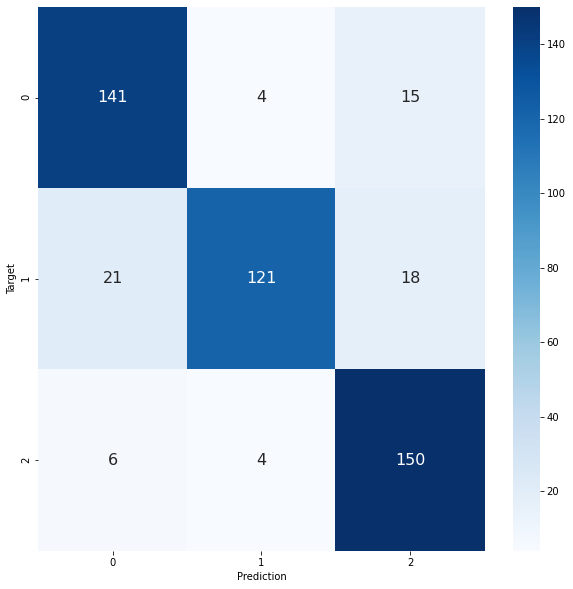

In [19]:
predictions = list()
targets = list()

model.eval()
with torch.no_grad():
    for images, labels in val_loader:
        output = model(images)
        
        predictions.extend(
            output.argmax(1).tolist()
        )
        
        targets.extend(
            labels.tolist()
        )
        
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(targets, predictions, labels=[0,1,2])

plt.figure(figsize=(10,10))
sns.heatmap(mat, annot=True, annot_kws={"size": 16}, fmt="d", cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.show()

<div dir=rtl>
    נשים לב שהדיוק לא מושלם אבל יחסית גבוה. האינפוט היה תמונה. בלמידה עמוקה המודל לומד בעצמו את הפיצ'רים הרלוונטיים לסיווג. מסיבה זו במקומות מסוימים נראה שלחלק בו עשינו קונבולוציות במודל יקראו feature extractor ולחלק הלינארי במודל classifier.
</div>

## <div dir=rtl>שאלה 2</div>

<div dir=rtl>
    חזרו על הלמידה ללא דרופאאוט.
</div>

<br /> 
<div dir=rtl>
    נעשה בדיוק זאת. נשכפל את הקוד רק שהפעם נוריד את הדרופאאוט מהמודל.
</div>

In [20]:
model = nn.Sequential(
    nn.Conv2d(3,4,3),
    nn.BatchNorm2d(4),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(4,16,3),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(16,16,3),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(16*10*10,100),
    nn.ReLU(),
    nn.Linear(100,3),
)
summary(model, (3,96,96))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 94, 94]             112
       BatchNorm2d-2            [-1, 4, 94, 94]               8
              ReLU-3            [-1, 4, 94, 94]               0
         MaxPool2d-4            [-1, 4, 47, 47]               0
            Conv2d-5           [-1, 16, 45, 45]             592
       BatchNorm2d-6           [-1, 16, 45, 45]              32
              ReLU-7           [-1, 16, 45, 45]               0
         MaxPool2d-8           [-1, 16, 22, 22]               0
            Conv2d-9           [-1, 16, 20, 20]           2,320
      BatchNorm2d-10           [-1, 16, 20, 20]              32
             ReLU-11           [-1, 16, 20, 20]               0
        MaxPool2d-12           [-1, 16, 10, 10]               0
          Flatten-13                 [-1, 1600]               0
           Linear-14                  [

In [21]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [22]:
epoch_train_losses_no_do = list()
epoch_valid_losses_no_do = list()

for iteration in range(n_epochs):
    batch_losses = list()
    
    model.train()
    for images, labels in train_loader:
        output = model(images)

        loss = loss_func(output, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_losses.append(loss.item())
        
    model.eval()
    batch_val_losses = list()
    with torch.no_grad():
        for images, labels in val_loader:
            output = model(images)
            loss = loss_func(output, labels)
            batch_val_losses.append(loss.item())
            
    
    epoch_train_losses_no_do.append(np.mean(batch_losses))
    epoch_valid_losses_no_do.append(np.mean(batch_val_losses))
    print(f'Epoch {iteration}: Train loss {epoch_train_losses_no_do[-1]:0.4f}, Val loss {epoch_valid_losses_no_do[-1]:0.4f}')

Epoch 0: Train loss 0.8294, Val loss 0.5899
Epoch 1: Train loss 0.5461, Val loss 0.4421
Epoch 2: Train loss 0.4487, Val loss 0.3879
Epoch 3: Train loss 0.4250, Val loss 0.3653
Epoch 4: Train loss 0.3778, Val loss 0.3481
Epoch 5: Train loss 0.3534, Val loss 0.3394
Epoch 6: Train loss 0.3226, Val loss 0.3390
Epoch 7: Train loss 0.3105, Val loss 0.3183
Epoch 8: Train loss 0.2954, Val loss 0.3105
Epoch 9: Train loss 0.2797, Val loss 0.3313


Text(0, 0.5, 'Loss')

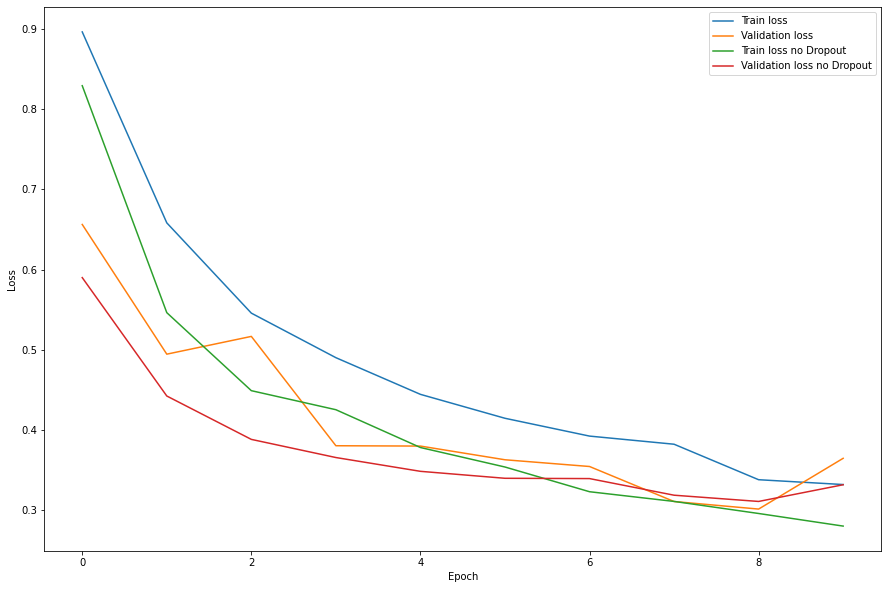

In [23]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(len(epoch_train_losses)), epoch_train_losses)
plt.plot(np.arange(len(epoch_valid_losses)), epoch_valid_losses)
plt.plot(np.arange(len(epoch_train_losses_no_do)), epoch_train_losses_no_do)
plt.plot(np.arange(len(epoch_valid_losses_no_do)), epoch_valid_losses_no_do)
plt.legend(['Train loss', 'Validation loss','Train loss no Dropout', 'Validation loss no Dropout'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

<div dir=rtl>
    נתייחס קודם לתוצאות המיידיות. פתחנו את התרגול בהיכרות עם השכבות הבסיסיות בלמידה עמוקה וטענו ששכבת דרופאאוט עוזרת להילחם באוברפיט. אנחנו אומנם רואים שהלוס עבור הtrain טוב יותר ללא dropout אבל ברגע שמסתכלים על כמה המודל מצליח להכליל טוב על סט הואלידציה רואים שיש עליה בloss לעומת הדאטה שנבדק על מודל עם dropout  
    <br />
    התוצאה הזו נחמדה, אבל השיטה מלמדת אותנו עקרון חשוב בלמידה עמוקה - השוואה צד אל צד. רשתות נוירונים נחשבות כ"קופסה שחורה" בעולם הלמידת מכונה. אנחנו לא יודעים בדיוק מה המודל למד, לא יודעים אילו פיצ'רים נמצאו, לא יודעים איך נראת פונקצית השגיאה כתלות בכל הפרמטרים (וגם לא מסוגלים לדמיין את זה) וגם אם נבדוק - באימון הבא אנחנו עלולים למצוא דברים אחרים. משום זאת חשוב מאוד לבצע שינויים בצורה הדרגתית ולהשוות בין שני מצבים כשאנחנו מסתכלים על על כל מצב לפני ואחרי בהשוואה צד לצד. באופן הזה נוכל לקבל תובנות משמעותיות על המערכת שבידינו.
</div>